In [2]:
#Import libs
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
train_file_path = './train.csv'
df_train = pd.read_csv(train_file_path)
df_train.columns


Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

<h2>Determining the important variables that affect SalePrice</h2>
Through visual analyisis of the data, we can conclude that approximately the variables that seem to affect the SalePrice the most dramatically turn out to be: <b>OverallQual</b>, <b>YearBuilt</b>, <b>TotalBsmtSF</b> and <b>GrLivArea</b>. There are many other variables that seem to affect the SalePrice in a positive correlation trend, however these are the most obvious ones when doing a visual analyisis.

In [4]:
#Filter out the important variables and store them
important_vars = ['OverallQual','YearBuilt','TotalBsmtSF','GrLivArea','SalePrice']
df_specific = df_train[important_vars]
#Print visual view of data
df_specific.head()

,OverallQual,YearBuilt,TotalBsmtSF,GrLivArea,SalePrice
0,7,2003,856,1710,208500
1,6,1976,1262,1262,181500
2,7,2001,920,1786,223500
3,7,1915,756,1717,140000
4,8,2000,1145,2198,250000


<h2>How each of these variables affect SalePrice and what they mean</h2>
<ul>
    <li><b>OverallQual</b> - This is the overall quality of the house, It's not given or obvious how this figure was calculated, but the general trend seems to be that the higher this number is, the higher the SalePrice will be.</li>
    <li><b>YearBuilt</b> - The year the house was built, there seems to be some variance with this however generally, the SalePrice seems to increase as the houses get newer.</li>
    <li><b>TotalBsmtSF</b> - Total basement surface area, as the basement gets larger, the SalePrice increases</li>
    <li><b>GrLivArea</b> - Ground floor living area, as it gets larger, the SalePrice increases</li>
</ul>

In [5]:
print("Example: SalePrice is far lower in this record compared to")
print(df_specific.loc[[3]])
print("\nthis one")
print(df_specific.loc[[4]])
print("\n\nAll trends described above seem to generate a higher saleprice as predicted in the second record")

Example: SalePrice is far lower in this record compared to
   OverallQual  YearBuilt  TotalBsmtSF  GrLivArea  SalePrice
3            7       1915          756       1717     140000

this one
   OverallQual  YearBuilt  TotalBsmtSF  GrLivArea  SalePrice
4            8       2000         1145       2198     250000


All trends described above seem to generate a higher saleprice as predicted in the second record


In [6]:
#Check how Sale Price is distributed with these variables compared to the rest
df_specific['SalePrice'].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

Text(0, 0.5, 'Sale Price')

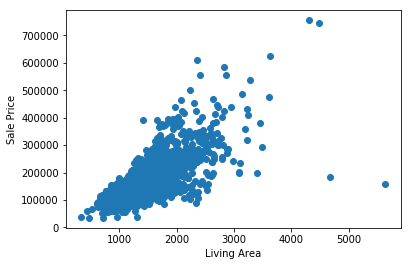

In [7]:
#GrLivArea trend
plt.scatter(df_specific['GrLivArea'],df_specific['SalePrice'])
plt.xlabel('Living Area')
plt.ylabel('Sale Price')
#Trend matches with prediciton, as the grlivarea increases, generally there is a strong positive correlation with saleprice

Text(0, 0.5, 'Sale Price')

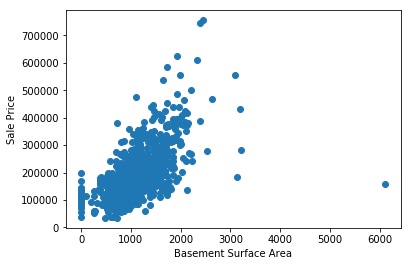

In [8]:
#The same prediciton is valid with the basement surface area
plt.scatter(df_specific['TotalBsmtSF'],df_specific['SalePrice'])
plt.xlabel('Basement Surface Area')
plt.ylabel('Sale Price')

<h3>An interesting trend with basement surface area</h3>
There is a lot of variance in the Sale Price when the basement surface area is at 0, this may be due to the fact that a lot of houses don't have basements, this is accounted for however looking at the scatter graph in general, we can still determine that the total basement surface area has a huge affect on the sale price due to the strong positive correlation

C:\Users\sharr\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


Text(0, 0.5, 'Sale Price')

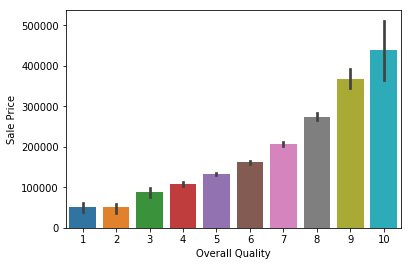

In [9]:
#How overall quality affects the sale price 
quality_sale = df_specific[['OverallQual','SalePrice']]
sns.barplot(df_specific['OverallQual'],df_specific['SalePrice'],data=quality_sale)
plt.xlabel('Overall Quality')
plt.ylabel('Sale Price')

<h3>Crystal clear trend with overall quality</h3>
An overall quality rating is given to each house between 1 and 10, from this graph we can conclude that the higher the overall quality is, the better the house must be. This is a crystal clear trend that has little to no variance on how the quality is distributed, it is very clear that as the quality increases, so does the sale price

Text(0, 0.5, 'Year Built')

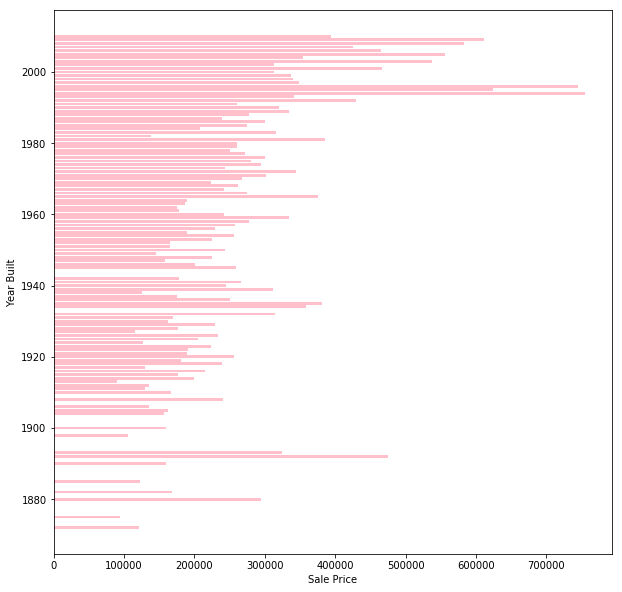

In [11]:
#How the year the house was built affects the sale price
plt.figure(figsize=(10,10))
plt.barh(df_specific['YearBuilt'],df_specific['SalePrice'],color='pink')
plt.xlabel('Sale Price')
plt.ylabel('Year Built')

<h3>Comments on trend about year built</h3>
Althought there seems to be quite an obvious trend that newer houses are more expensive, we can see that some of the really old ones compete quite well with the new ones, especially those from 1880s-1900s, this may be due to the houses having a histroic value, which affects the overall sale price (could be seen as 'antique')

<h1>Conclusion</h1>
These select few variables are perfect to create the regression model for our house sale price predictions as they all have strong trends dependant on the sale price, a lot of variables usually have little to no significance when it comes to determining the final price, so it was important for us to filter them out, or our model could have inaccuracies.